In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


In [128]:
df_sharks = pd.read_csv("./data/final_data_shark.csv",encoding="unicode_escape")
df = df_sharks

In [58]:
df.shape
df.head()


,Unnamed: 0,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month,Provoked
0,0,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",jun,Y
1,3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,27,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",jun,Y
2,4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,27,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,jun,N
3,6,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",jun,Y
4,7,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",may,Y


In [59]:
print(df.columns)

Index(['Unnamed: 0', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'Month', 'Provoked'],
      dtype='object')


In [129]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12,6)})
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))
#sns.set(rc={'figure.figsize':(10,4)})


<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

<AxesSubplot:xlabel='Age'>

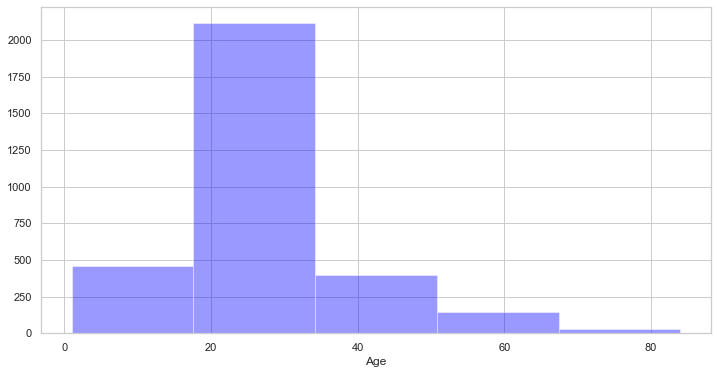

In [121]:
sns.distplot(df['Age'], kde = False, color ='blue', bins = 5)
#plt.hist(df.Age, bins= 20)


In [2]:
sharks['Year'] = sharks[sharks['Year']>1930]['Year']
Years_values = sharks['Year'].value_counts().sort_index()
Years_values.plot(title="Shark Attacks per year")

Years_values

NameError: name 'sharks' is not defined

<AxesSubplot:xlabel='Age', ylabel='Count'>

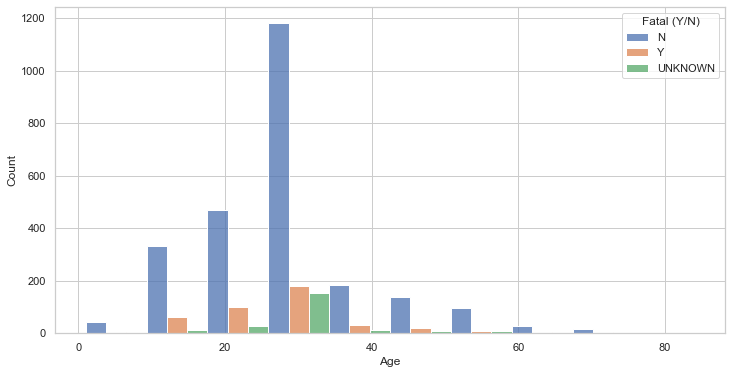

In [131]:
#age/fatality
#sex/fatality
#activity/fatality
#shark/fatality
#provoked/fatality
#sex/provoked
#activity/provoked
sns.histplot(data=df, x="Age", hue="Fatal (Y/N)", multiple="dodge", bins=10)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

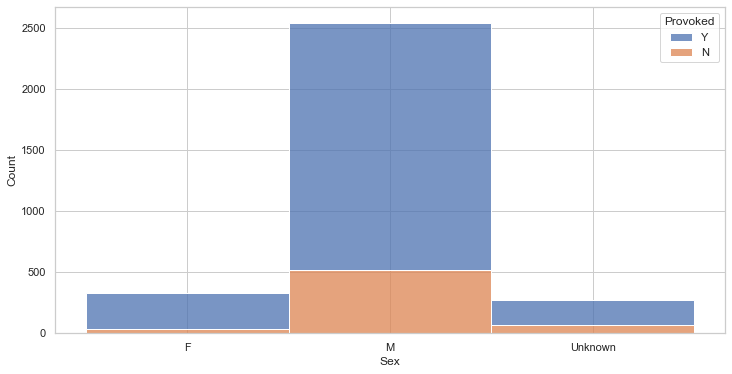

In [132]:
sns.histplot(data=df, x= "Sex", hue="Provoked", multiple="stack")

<AxesSubplot:title={'center':'What months are the deadliest?'}, xlabel='Month'>

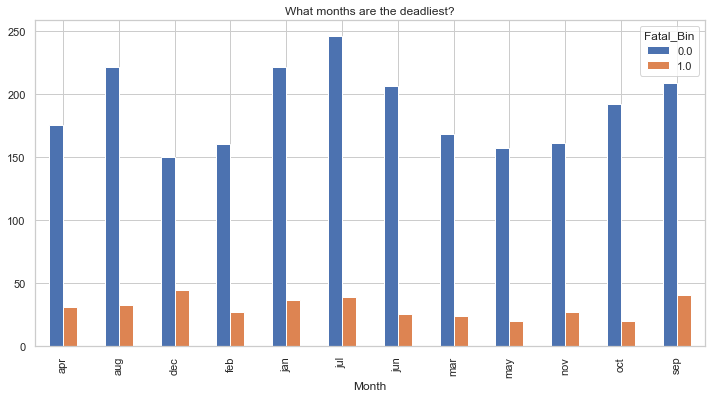

In [122]:
df['Fatal_Bin'] = df[df['Fatal (Y/N)'].isin(['Y','N'])]['Fatal (Y/N)']
df['Fatal_Bin'] = df['Fatal_Bin'].str.replace('N',"0").str.replace('Y',"1").dropna().astype(int)
df.groupby(["Month","Fatal_Bin"]).size().to_frame().unstack(level="Fatal_Bin")[0].plot.bar(title= "What months are the deadliest?")

<AxesSubplot:title={'center':'Which activities are most fatal?'}, xlabel='Fatal_Bin'>

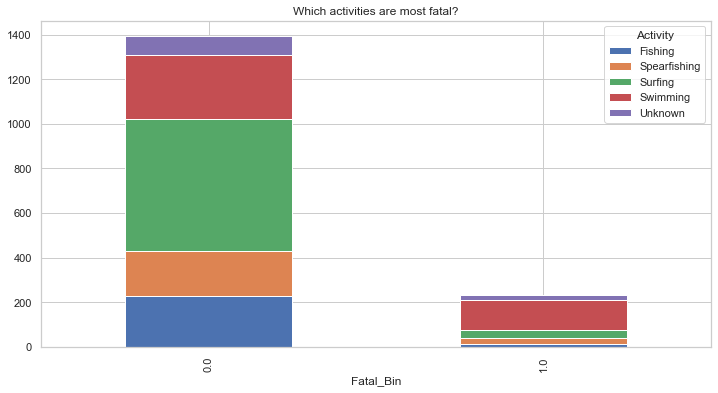

In [133]:
df['Fatal_Bin'] = df[df['Fatal (Y/N)'].isin(['Y','N'])]['Fatal (Y/N)']
df['Fatal_Bin'] = df['Fatal_Bin'].str.replace('N',"0").str.replace('Y',"1").dropna().astype(int)
df.groupby("Activity").filter(lambda x: len(x) > 100).groupby(["Activity","Fatal_Bin"]).size().to_frame().unstack(level=0)[0].plot.bar(stacked=True, title = "Which activities are most fatal?")

<AxesSubplot:title={'center':'Which activities are most fatal?'}, xlabel='Fatal_Bin'>

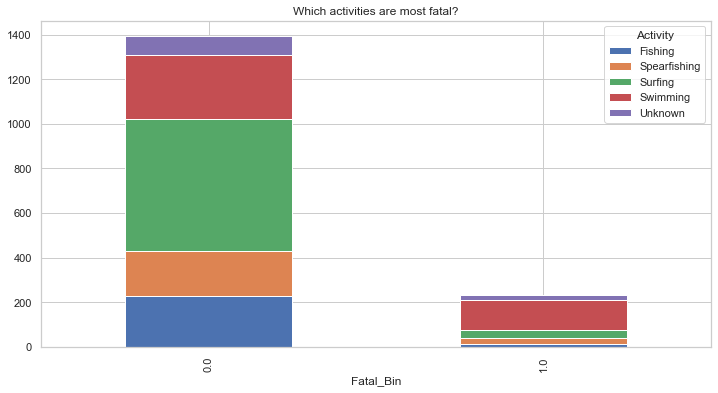

In [91]:
df\
  .groupby("Activity").filter(lambda x: len(x) > 100)\
  .groupby(["Activity","Fatal_Bin"])\
  .size().to_frame().unstack(level=0)[0].plot.bar(stacked=True, title = "Which activities are most fatal?")

[]

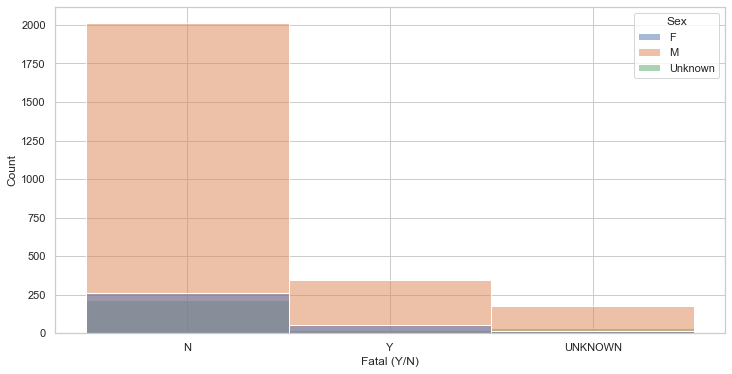

In [134]:
sns.histplot(data=df, x="Fatal (Y/N)", hue="Sex", alpha=0.5)
plt.xticks(rotation=0)
plt.plot()

In [135]:
grouping = df.groupby(["Fatal (Y/N)"])["Sex"].value_counts().unstack()
grouping

sex= df["Sex"].unique()  # This is a list with the names
fig = go.Figure(data=[
    go.Bar(name="Fatal", x=sex, y=grouping["Fatal (Y/N)"]),
    go.Bar(name="Fatal", x=sex, y=grouping["N"]),
    go.Bar(name="Fatal", x=sex, y=grouping["Unknown"])
])
#Changing the type of the bars
fig.update_layout(barmode="stack")
fig.show()

KeyError: 'Fatal (Y/N)'

<AxesSubplot:xlabel='Sex', ylabel='Count'>

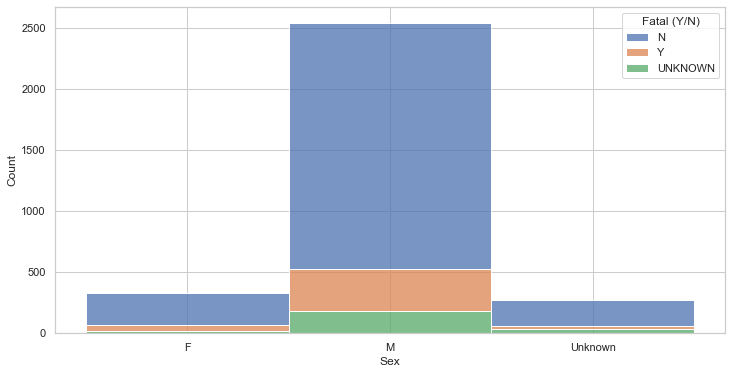

In [139]:
#sns.histplot(data=titanic, x="Age", hue="Survived", multiple="stack")
provocation = df.groupby("Sex")["Fatal (Y/N)"].value_counts()
#Sex, provoced, Fatal
sns.histplot(data=df, x="Sex", hue="Fatal (Y/N)", multiple="stack")

In [145]:
provocation

Sex      Fatal (Y/N)
F        N               260
         Y                53
         UNKNOWN          17
M        N              2015
         Y               348
         UNKNOWN         180
Unknown  N               216
         UNKNOWN          34
         Y                22
Name: Fatal (Y/N), dtype: int64

In [144]:
colnames = ["Sex", "Fatal (Y/N)", "Count"]
df=pd.DataFrame(provocation,columns=colnames)
print(colnames)

['Sex', 'Fatal (Y/N)', 'Count']


In [146]:
df

Sex  Fatal (Y/N) Count
Sex     Fatal (Y/N)                        
F       N            NaN          260   NaN
        Y            NaN           53   NaN
        UNKNOWN      NaN           17   NaN
M       N            NaN         2015   NaN
        Y            NaN          348   NaN
        UNKNOWN      NaN          180   NaN
Unknown N            NaN          216   NaN
        UNKNOWN      NaN           34   NaN
        Y            NaN           22   NaN